In [1]:
### Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
#### reading the file
walmart_train=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\Kaggle competition\walmart\train.csv')
walmart_test=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\Kaggle competition\walmart\test.csv')
walmart_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
walmart_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [4]:
walmart_train=walmart_train.drop_duplicates()

In [5]:
walmart_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [3]:
##### Converting to time series data
walmart_train['Date']=pd.to_datetime(walmart_train['Date'])

In [7]:
##### Checking the conversion
walmart_train.info()
walmart_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null datetime64[ns]
IsHoliday    115064 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [4]:
##### setting index
walmart_train.set_index('Date',inplace=True)

In [5]:
walmart_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [5]:
walmart_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [11]:
##### Checking the corresponding weekly sales for Holidays and how seasonality is seen
weekly_holiday_sales=walmart_train[(walmart_train['IsHoliday']==True)].groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_holiday_sales

,Date,Weekly_Sales
0,2010-02-12,48336677.63
1,2010-09-10,45634397.84
2,2010-11-26,65821003.24
3,2010-12-31,40432519.00
4,2011-02-11,47336192.79
5,2011-09-09,46763227.53
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-02-10,50009407.92
9,2012-09-07,48330059.31


In [12]:
walmart_train.loc['2010-12-02','Weekly_Sales']

Series([], Name: Weekly_Sales, dtype: float64)

In [13]:
walmart_train['Difference']=walmart_train['Weekly_Sales'].pct_change()*100

In [14]:
## With lag one shift
walmart_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Difference
Date,,,,,
2010-02-05,1,1,24924.50,False,NaN
2010-02-12,1,1,46039.49,True,84.715802
2010-02-19,1,1,41595.55,False,-9.652453
2010-02-26,1,1,19403.54,False,-53.351885
2010-03-05,1,1,21827.90,False,12.494421


Date
2010-12-31    AxesSubplot(0.08,0.2;0.87x0.68)
2011-12-31    AxesSubplot(0.08,0.2;0.87x0.68)
2012-12-31    AxesSubplot(0.08,0.2;0.87x0.68)
Freq: A-DEC, Name: Difference, dtype: object

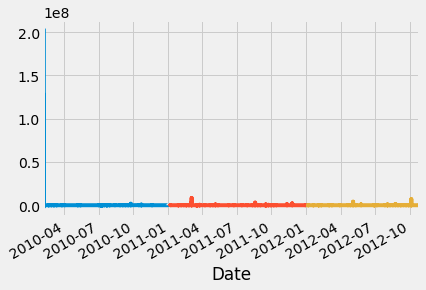

In [15]:
#### How percent change between previous and today
plt.style.use('fivethirtyeight')
walmart_train.resample('Y')['Difference'].plot()

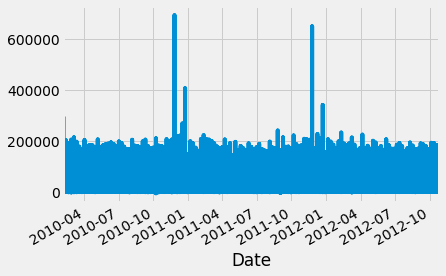

In [16]:
##### Frequency of sales
plt.style.use('fivethirtyeight')
walmart_train.Weekly_Sales.plot()

In [17]:
##### Yearly sales
yearly=walmart_train.resample('Y')['Weekly_Sales'].sum()
yearly

Date
2010-12-31    2.288886e+09
2011-12-31    2.448200e+09
2012-12-31    2.000133e+09
Freq: A-DEC, Name: Weekly_Sales, dtype: float64

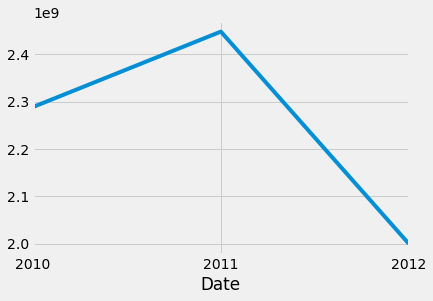

In [18]:
plt.style.use('fivethirtyeight')
yearly.plot()

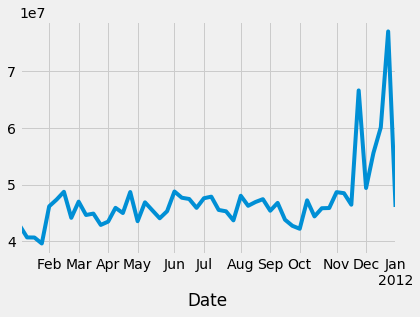

In [19]:
##### How weekly sales are varied in the year in 2011
plt.style.use('fivethirtyeight')
walmart_train['2011-01-01':'2011-12-31'].resample('W')['Weekly_Sales'].sum().plot()

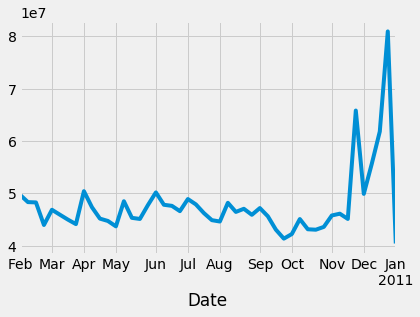

In [20]:
##### How weekly sales are varied in the year in 2010
plt.style.use('fivethirtyeight')
walmart_train['2010':'2010-12-31'].resample('W')['Weekly_Sales'].sum().plot()

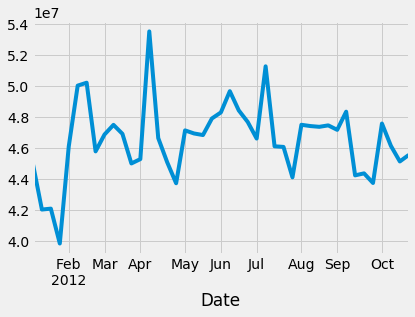

In [21]:
#### How weekly sales are varied in the year in 2012
plt.style.use('fivethirtyeight')
walmart_train['2012':'2012-12-31'].resample('W')['Weekly_Sales'].sum().plot()

In [ ]:
### Data Exploration
### From the data exploration it is clear that the sales follows seasonality and there is peak in December and January which is 
### founded to be Labours day, Thanksgiving and Christmas days and it follows usual pattern of higher sales during Holidays

In [7]:
##### Reading the features
features=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\Kaggle competition\walmart\features.csv',parse_dates=['Date'])
features.head()
features=features.set_index('Date')
features.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


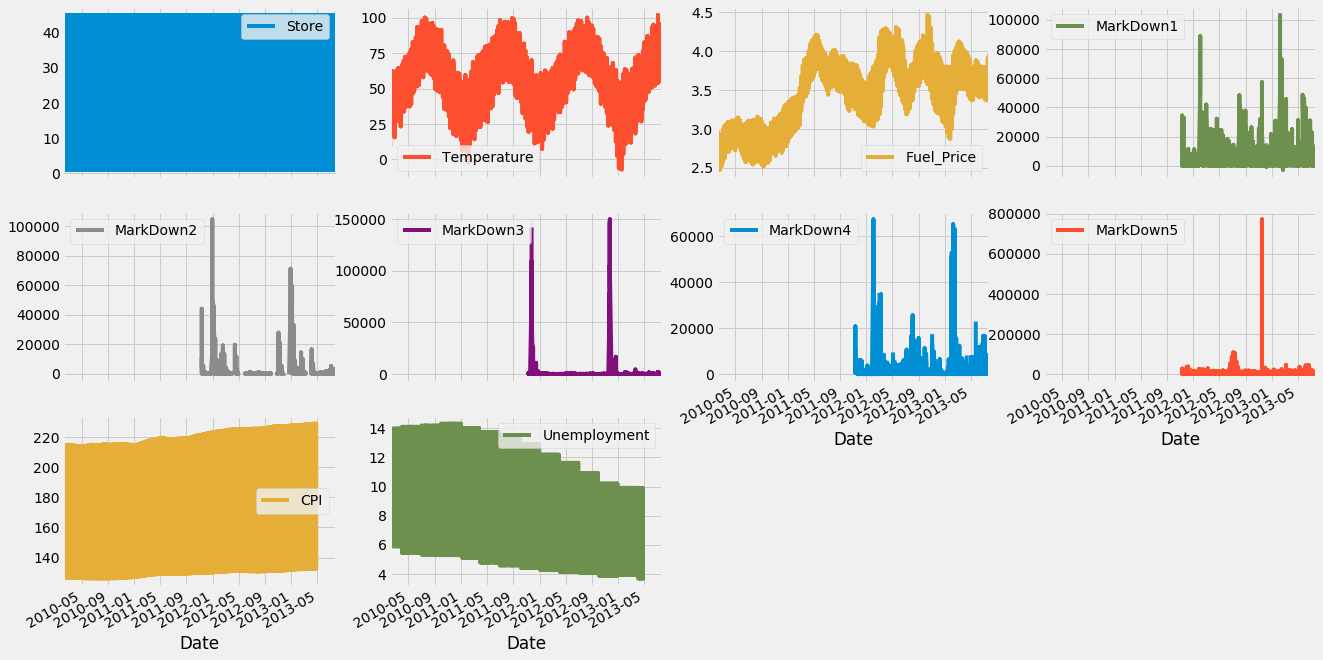

In [23]:
ax=features.plot(subplots=True,layout=(4,4),figsize=(20,16),sharex=True)
plt.show()

In [ ]:
#### This plot shows the distribution of feature data across each stores.

In [24]:
walmart_train['2010':'2010-12-01'].resample('M')['Weekly_Sales'].sum()

Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
2010-07-31    2.325801e+08
2010-08-31    1.876401e+08
2010-09-30    1.772679e+08
2010-10-31    2.171618e+08
2010-11-30    2.028534e+08
Freq: M, Name: Weekly_Sales, dtype: float64

In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2010-02-05 to 2013-07-26
Data columns (total 11 columns):
Store           8190 non-null int64
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1)
memory usage: 711.8 KB


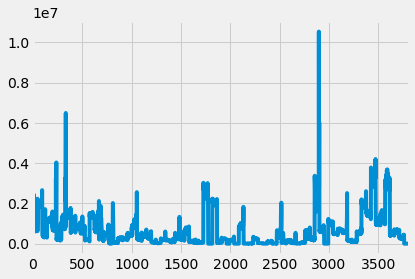

In [26]:
dept=walmart_train['2010':'2010-12-31'].groupby('Dept').resample('W')['Weekly_Sales'].sum().reset_index()
plt.style.use('fivethirtyeight')
dept.Weekly_Sales.plot()

In [ ]:
#### This plot shows the distribution of prices weekly for the year 2010 and it shows seasonality every month

<BarContainer object of 3809 artists>

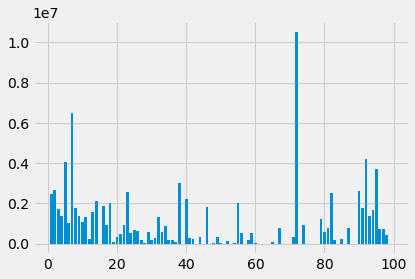

In [27]:
##### Department wise weekly sales
plt.style.use('fivethirtyeight')
plt.bar(dept['Dept'],height=dept['Weekly_Sales'])


In [ ]:
#### This plot shows department wise weekly sales.

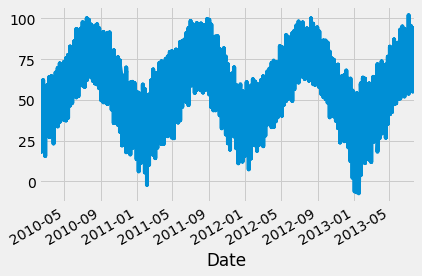

In [28]:
##### Temperature frequency by year
plt.style.use('fivethirtyeight')
features.Temperature.plot()

In [ ]:
#### This plot shows how temperature is changing for each year and can we find any relationship between sales and temperature.

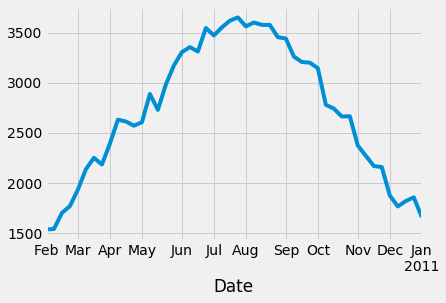

In [29]:
##### How temperature differ weekly in 2010
plt.style.use('fivethirtyeight')
features['2010':'2010-12-31'].resample('W')['Temperature'].sum().plot()

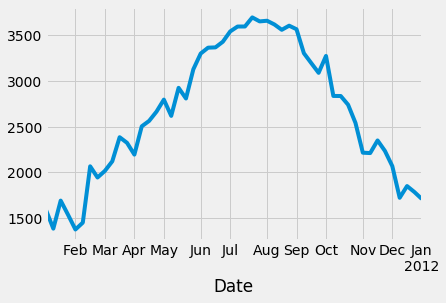

In [30]:
##### How temperature differ weekly in 2011
plt.style.use('fivethirtyeight')
features['2011':'2011-12-31'].resample('W')['Temperature'].sum().plot()

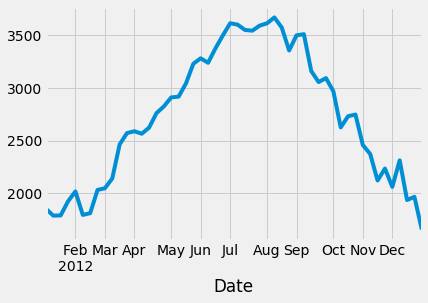

In [31]:
##### How temperature differ weekly in 2011
plt.style.use('fivethirtyeight')
features['2012':'2012-12-31'].resample('W')['Temperature'].sum().plot()

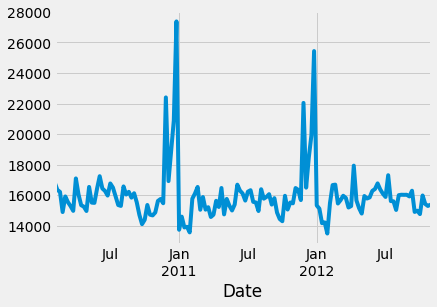

In [32]:
##### Weekly sales
plt.style.use('fivethirtyeight')
walmart_train.resample('W')['Weekly_Sales'].mean().plot()

In [33]:
walmart_train

,Store,Dept,Weekly_Sales,IsHoliday,Difference
Date,,,,,
2010-02-05,1,1,24924.50,False,NaN
2010-02-12,1,1,46039.49,True,84.715802
2010-02-19,1,1,41595.55,False,-9.652453
2010-02-26,1,1,19403.54,False,-53.351885
2010-03-05,1,1,21827.90,False,12.494421
...,...,...,...,...,...
2012-09-28,45,98,508.37,False,8.788787
2012-10-05,45,98,628.10,False,23.551744
2012-10-12,45,98,1061.02,False,68.925330


In [34]:
correlation=walmart_train.corr()

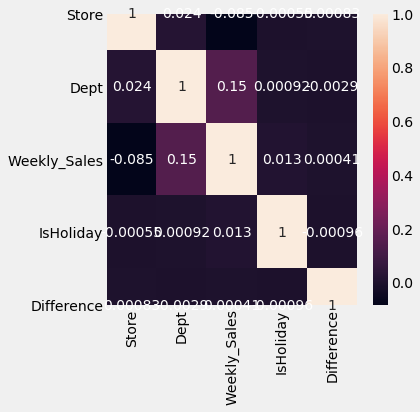

In [35]:
##### Looking for any correlations
plt.figure(figsize=(5,5))
sns.heatmap(correlation,annot=True)

In [ ]:
### The correlation matrix shows that there is no correlation in variables so the data will be non-linear, so using non-linear 
### predictive model will be useful.

Text(0, 0.5, 'Weekly_Sales')

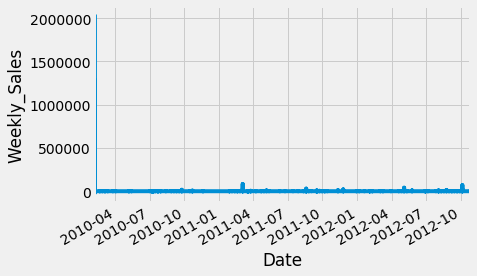

In [36]:
plt.style.use('fivethirtyeight')
ax=walmart_train['Weekly_Sales'].pct_change().plot()
ax.set_ylabel('Weekly_Sales')

In [37]:
index_month=walmart_train.index.month
month=walmart_train.groupby(index_month)['Weekly_Sales'].mean()

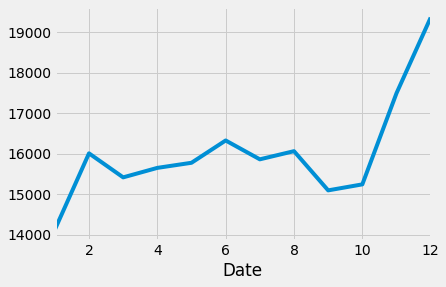

In [38]:
##### Each month sales for all the years
month.plot()

In [ ]:
### This gives the monthly sales across each month the sales generally peaks during the months of Feburary,October, November 
### and December.

Text(0.5, 1.0, 'Weekly Sales for 2010')

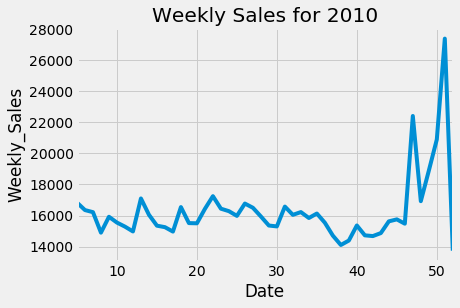

In [39]:
index_month_2010=walmart_train['2010':'2010-12-31'].index.week
ax=walmart_train['2010':'2010-12-31'].groupby(index_month_2010)['Weekly_Sales'].mean().plot()
ax.set_ylabel('Weekly_Sales')
ax.set_title('Weekly Sales for 2010')

In [ ]:
### This plot shows each week wise sales in all Departments.

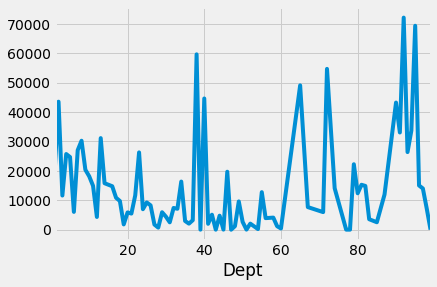

In [40]:
Dept_weekly=walmart_train['2010':'2010-12-31'].groupby(['Dept'])['Weekly_Sales'].mean()
Dept_weekly.plot()

In [ ]:
### This gives the monthly sales across each Department for the year 2010

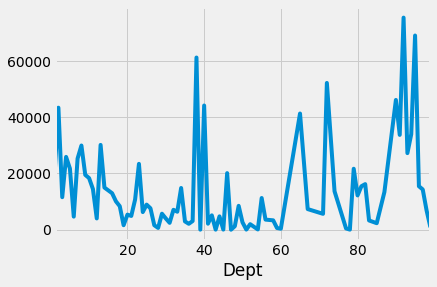

In [41]:
Dept_weekly=walmart_train['2011':'2011-12-31'].groupby(['Dept'])['Weekly_Sales'].mean()
Dept_weekly.plot()

In [ ]:
### This gives the monthly sales across each Department for the year 2011

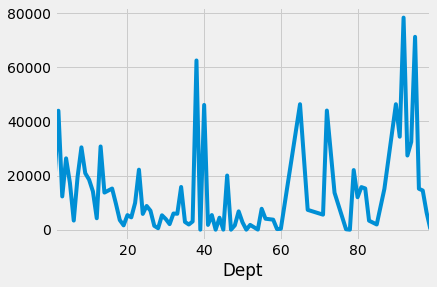

In [42]:
Dept_weekly=walmart_train['2012':'2012-12-31'].groupby(['Dept'])['Weekly_Sales'].mean()
Dept_weekly.plot()

In [ ]:
### This gives the monthly sales across each Department for the year 2012

In [43]:
walmart_train.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Difference
Date,,,,,
2012-09-28,45,98,508.37,False,8.788787
2012-10-05,45,98,628.10,False,23.551744
2012-10-12,45,98,1061.02,False,68.925330
2012-10-19,45,98,760.01,False,-28.369871
2012-10-26,45,98,1076.80,False,41.682346


In [44]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [45]:
walmart_train.groupby(['Store']).Weekly_Sales.sum().nlargest()

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

In [71]:
TypeA=walmart_train[walmart_train.Store==20]
TypeB=walmart_train[walmart_train.Store==4]
TypeC=walmart_train[walmart_train.Store==14]
TypeD=walmart_train[walmart_train.Store==13]
TypeE=walmart_train[walmart_train.Store==2]

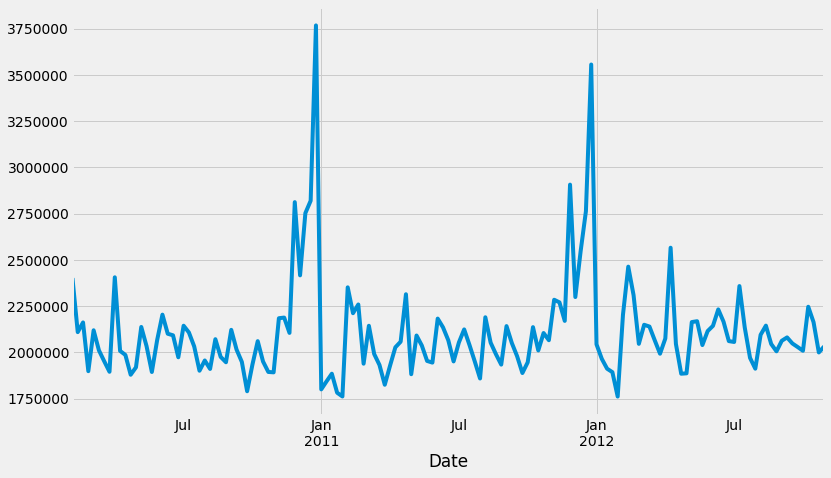

In [91]:
### Finding the frequency of weekly sales for the store 20 which has highest sales in Overall.
TypeA.resample('W').Weekly_Sales.sum().plot()

C:\Users\kkbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """


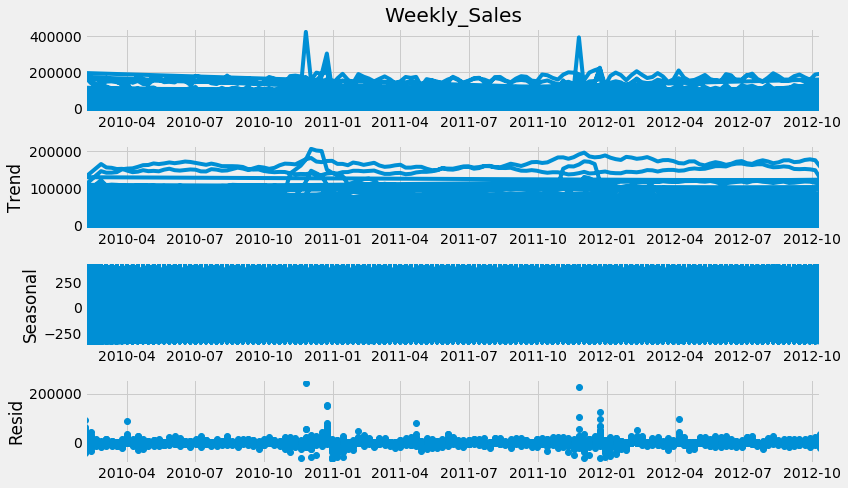

In [92]:
## Finding seasonality trend and residuals of Type A sale store
import statsmodels.api as sm 
from pylab import rcParams

rcParams['figure.figsize']= 12,7
decomposition=sm.tsa.seasonal_decompose(TypeA['Weekly_Sales'],freq=7)
decomposition.plot()
plt.show()

In [ ]:
## From the plot it is clear that the store follows somekind of trend and seasonality and let us make the data stationary for 
## prediction.

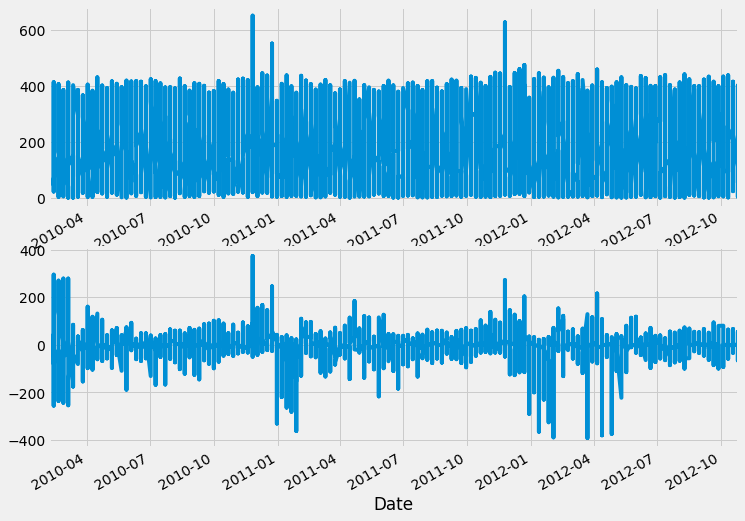

In [102]:
### Removing variance from sales amd making it stationary for Type A
TypeA['log_transform']=np.sqrt(TypeA['Weekly_Sales'])
TypeA['Seasonal_diff']=TypeA['log_transform']-TypeA['log_transform'].shift(5)
TypeA=TypeA.dropna()
fig,(ax1,ax2)=plt.subplots(2,figsize=(11,9))
TypeA['log_transform'].plot(ax=ax1)
TypeA['Seasonal_diff'].plot(ax=ax2)

In [ ]:
### We use square root transform to make the data with same variance and we use shift operator to remove seasonaity from the 
### data.

In [103]:
## Conducting dicky-fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
results=adfuller(TypeA['Seasonal_diff'])
print(results)

(-20.27529319657796, 0.0, 39, 10092, {'1%': -3.430998133578832, '5%': -2.8618264367750066, '10%': -2.5669224651545064}, 90489.11275445891)


In [ ]:
# Using Adfuller test and from plot we can interepret that the data is stationary.

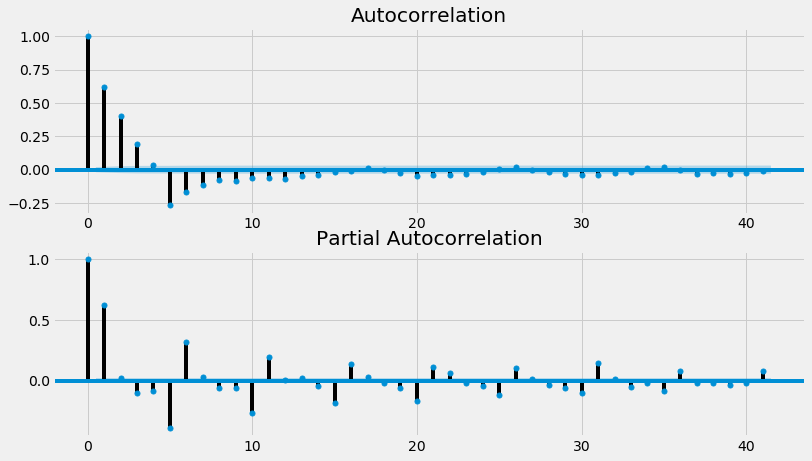

In [104]:
##### Finding partial correlation and auto correlation for Type C store
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,(ax1,ax2)=plt.subplots(2,1)
tsaplots.plot_acf(TypeA['Seasonal_diff'],alpha=0.05,ax=ax1)
tsaplots.plot_pacf(TypeA['Seasonal_diff'],alpha=0.05,ax=ax2)
plt.show()

In [ ]:
### The correlation and auto correlation both tails off indicating ARIMA process, it indicates the model of ma order of 3 or 4
### and AR of order 1 and wiht seasonality with AR process at lag 5.

In [105]:
### Let us predict using SARIMA model for typeA store
from statsmodels.tsa.statespace.sarimax import SARIMAX

order=[]
for p in range(3):
    for q in range(3):
        for P in range(3):
            for Q in range(3):
                model=SARIMAX(TypeC['Weekly_Sales'],order=(p,1,q),seasonal_order=(P,1,Q,5))
                results=model.fit()
                order.append((p,q,P,Q,results.aic,results.bic))

C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic a

LinAlgError: LU decomposition error.

In [106]:
order_aic_bic=pd.DataFrame(order,columns=['p','q','P','Q','AIC','BIC'])
print(order_aic_bic.sort_values('AIC'))

    p  q  P  Q            AIC            BIC
16  0  1  2  1  214130.777339  214166.810005
22  0  2  1  1  214133.800511  214169.833177
13  0  1  1  1  214149.331866  214178.157999
17  0  1  2  2  214284.591952  214327.831151
19  0  2  0  1  214314.068843  214342.894976
10  0  1  0  1  214326.875410  214348.495009
14  0  1  1  2  214401.345659  214437.378325
7   0  0  2  1  216206.428848  216235.254981
2   0  0  0  2  216210.551549  216232.171148
4   0  0  1  1  216223.497453  216245.117052
8   0  0  2  2  216328.498837  216364.531502
5   0  0  1  2  216386.205098  216415.031230
1   0  0  0  1  216459.483431  216473.896497
11  0  1  0  2  216815.790131  216844.616263
25  0  2  2  1  217706.250899  217749.490098
23  0  2  1  2  217706.695746  217749.934945
20  0  2  0  2  217707.569078  217743.601744
15  0  1  2  0  218419.945696  218448.771829
24  0  2  2  0  219084.743275  219120.775940
6   0  0  2  0  219264.939554  219286.559153
12  0  1  1  0  219459.740722  219481.360322
21  0  2  

In [107]:
print(order_aic_bic.sort_values('BIC'))

    p  q  P  Q            AIC            BIC
16  0  1  2  1  214130.777339  214166.810005
22  0  2  1  1  214133.800511  214169.833177
13  0  1  1  1  214149.331866  214178.157999
17  0  1  2  2  214284.591952  214327.831151
19  0  2  0  1  214314.068843  214342.894976
10  0  1  0  1  214326.875410  214348.495009
14  0  1  1  2  214401.345659  214437.378325
2   0  0  0  2  216210.551549  216232.171148
7   0  0  2  1  216206.428848  216235.254981
4   0  0  1  1  216223.497453  216245.117052
8   0  0  2  2  216328.498837  216364.531502
5   0  0  1  2  216386.205098  216415.031230
1   0  0  0  1  216459.483431  216473.896497
11  0  1  0  2  216815.790131  216844.616263
20  0  2  0  2  217707.569078  217743.601744
25  0  2  2  1  217706.250899  217749.490098
23  0  2  1  2  217706.695746  217749.934945
15  0  1  2  0  218419.945696  218448.771829
24  0  2  2  0  219084.743275  219120.775940
6   0  0  2  0  219264.939554  219286.559153
12  0  1  1  0  219459.740722  219481.360322
21  0  2  

In [ ]:
## Model with lowest AIC is choosen as the final model to predict the prices.

In [118]:
model=SARIMAX(TypeC['Weekly_Sales'],order=(0,1,1),seasonal_order=(2,1,1,5))

C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic a

In [119]:
results=model.fit()

In [120]:
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      Weekly_Sales   No. Observations:                 9968
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 5)   Log Likelihood             -107060.389
Date:                           Thu, 05 Mar 2020   AIC                         214130.777
Time:                                   21:53:00   BIC                         214166.810
Sample:                                        0   HQIC                        214142.976
                                          - 9968                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5061      0.002   -334.797      0.000      -0.509      -0.503
ar.S.L5       -0.1397      0.002    -66.487

In [ ]:
## The prob(Q) indicates that there is correlation between data and Prob(JB) tells that the data is normally distributed according
## to their p-values.

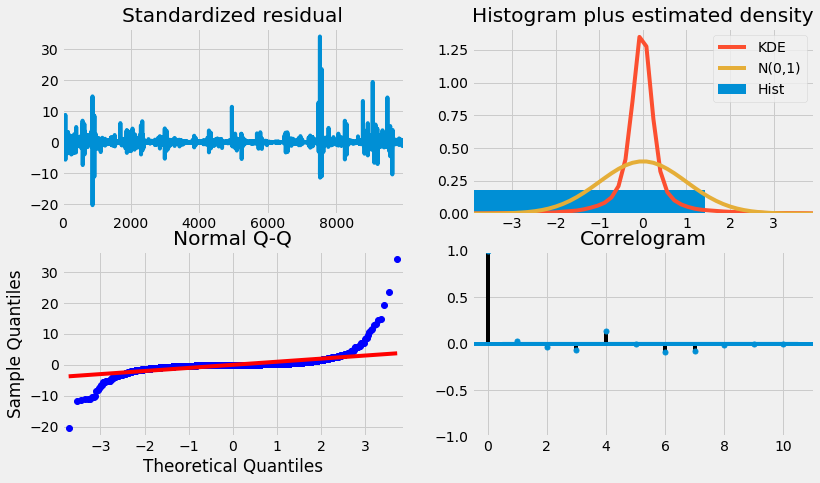

In [121]:
results.plot_diagnostics()
plt.show()

In [ ]:
## The diagnostic plots indicates that there is no correlation and data is almost normally distributed with noise in residuals

In [122]:
## Residual errors
residuals=results.resid
mae=np.mean(np.abs(residuals))
mae

4201.249869366208

In [123]:
## Forec=casting for values
forecast=results.get_prediction(start=-25)
mean_forecast=forecast.predicted_mean
print(mean_forecast)

Date
2011-12-23    3912.878081
2012-02-03    4716.735569
2012-02-10    2537.054125
2012-02-17    2439.026396
2012-02-24    1225.242574
2012-03-02     646.756113
2012-04-06     881.856200
2012-04-13     130.877888
2012-05-04     307.844886
2012-05-11     605.972479
2012-06-08     297.770275
2012-06-22     203.472921
2012-07-06     -10.831695
2012-07-13      36.085640
2012-07-20     483.334012
2012-07-27     132.503474
2012-08-03    -179.184836
2012-08-10       4.871240
2012-08-17      -4.221892
2012-08-24     402.972301
2012-08-31     743.010768
2012-09-07     110.928510
2012-09-14      68.648059
2012-10-05      43.609927
2012-10-12     599.020128
dtype: float64


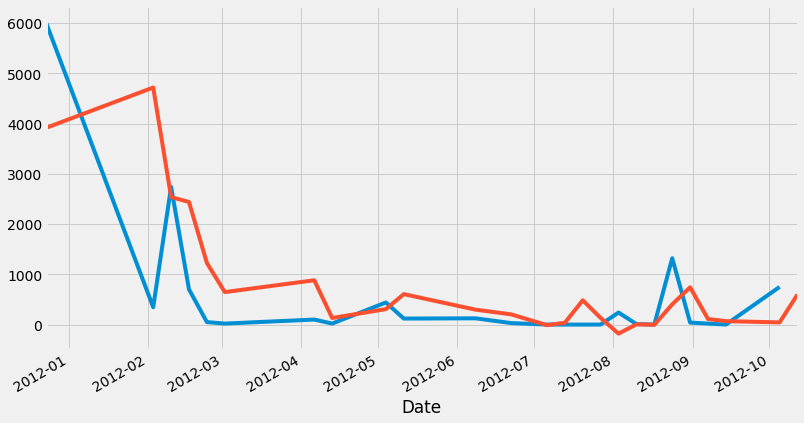

In [124]:
## checking how forecast values differ from normal forecated values
TypeC['Weekly_Sales'].iloc[-25:-1].plot()
mean_forecast.plot()

In [130]:
### Let us make forecast for next year sales.
future_forecast=results.get_forecast(steps=50)
#print(future_forecast.predicted_mean)
mean_pre=future_forecast.predicted_mean

C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [127]:
prediction=pd.DataFrame(mean_pre.values,index=walmart_test.index[:50],columns=['Prediction'])

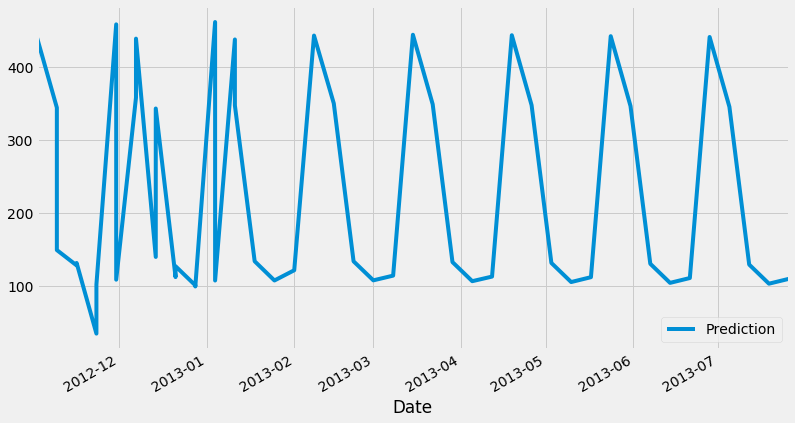

In [128]:
prediction.plot()

In [133]:
## Using auto arima to find the best model for the data
import pmdarima as pm
from pmdarima import auto_arima

result=pm.auto_arima(TypeA['log_transform'],seasonal=True)

C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\kkbal\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

In [134]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10132
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -45014.787
Date:                Thu, 05 Mar 2020   AIC                          90053.574
Time:                        22:08:22   BIC                          90140.254
Sample:                             0   HQIC                         90082.896
                              - 10132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0379      0.124     -0.306      0.759      -0.280       0.204
ar.L1         -0.5927      0.089     -6.650      0.000      -0.767      -0.418
ar.L2         -0.2515      0.034     -7.408      0.0

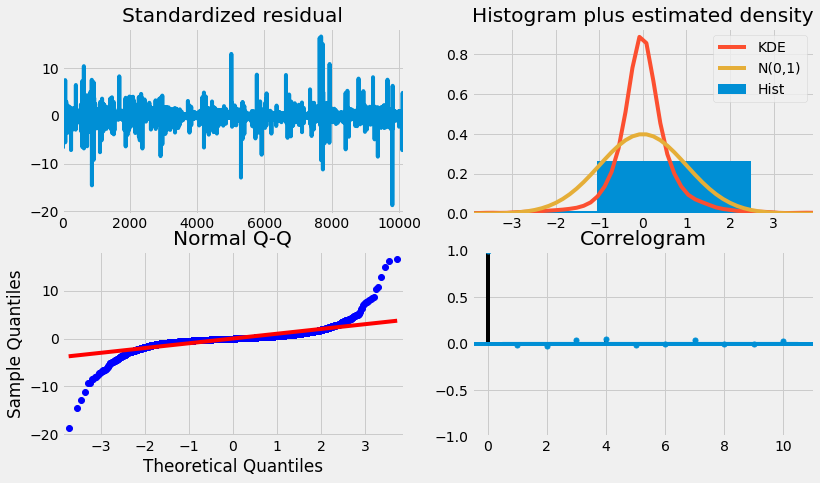

In [135]:
result.plot_diagnostics()
plt.show()

In [137]:
pred=result.predict(n_periods=30)

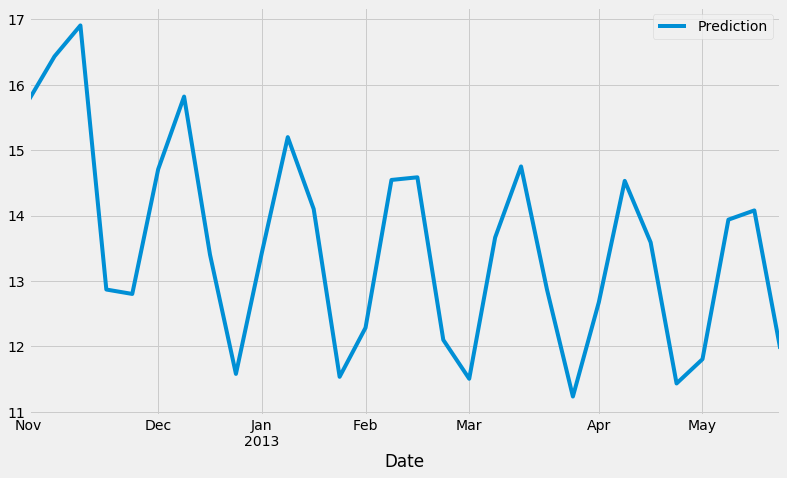

In [138]:
## Forecasting using auto arima model
pred_plot=pd.DataFrame(pred,index=walmart_test.index[:30],columns=['Prediction'])
pred_plot.plot()

In [8]:
### Using data Mining techniques

new=pd.merge(left=walmart_train,right=features,on='Store',how='inner')
new.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,24924.5,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,24924.5,False,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,24924.5,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,24924.5,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,24924.5,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
## Adding features, lets see whether it can improve models performance. 

In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76725740 entries, 0 to 76725739
Data columns (total 14 columns):
Store           int64
Dept            int64
Weekly_Sales    float64
IsHoliday_x     bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday_y     bool
dtypes: bool(2), float64(10), int64(2)
memory usage: 7.6 GB


In [207]:
new.isna().sum()

Store                  0
Dept                   0
Weekly_Sales           0
IsHoliday_x            0
Difference           364
Temperature            0
Fuel_Price             0
MarkDown1       38908848
MarkDown2       48537911
MarkDown3       42209878
MarkDown4       42908502
MarkDown5       38784440
CPI              5480410
Unemployment     5480410
IsHoliday_y            0
dtype: int64

In [9]:
new.fillna(0,inplace=True)
new.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,24924.5,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,24924.5,False,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,24924.5,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,24924.5,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,24924.5,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


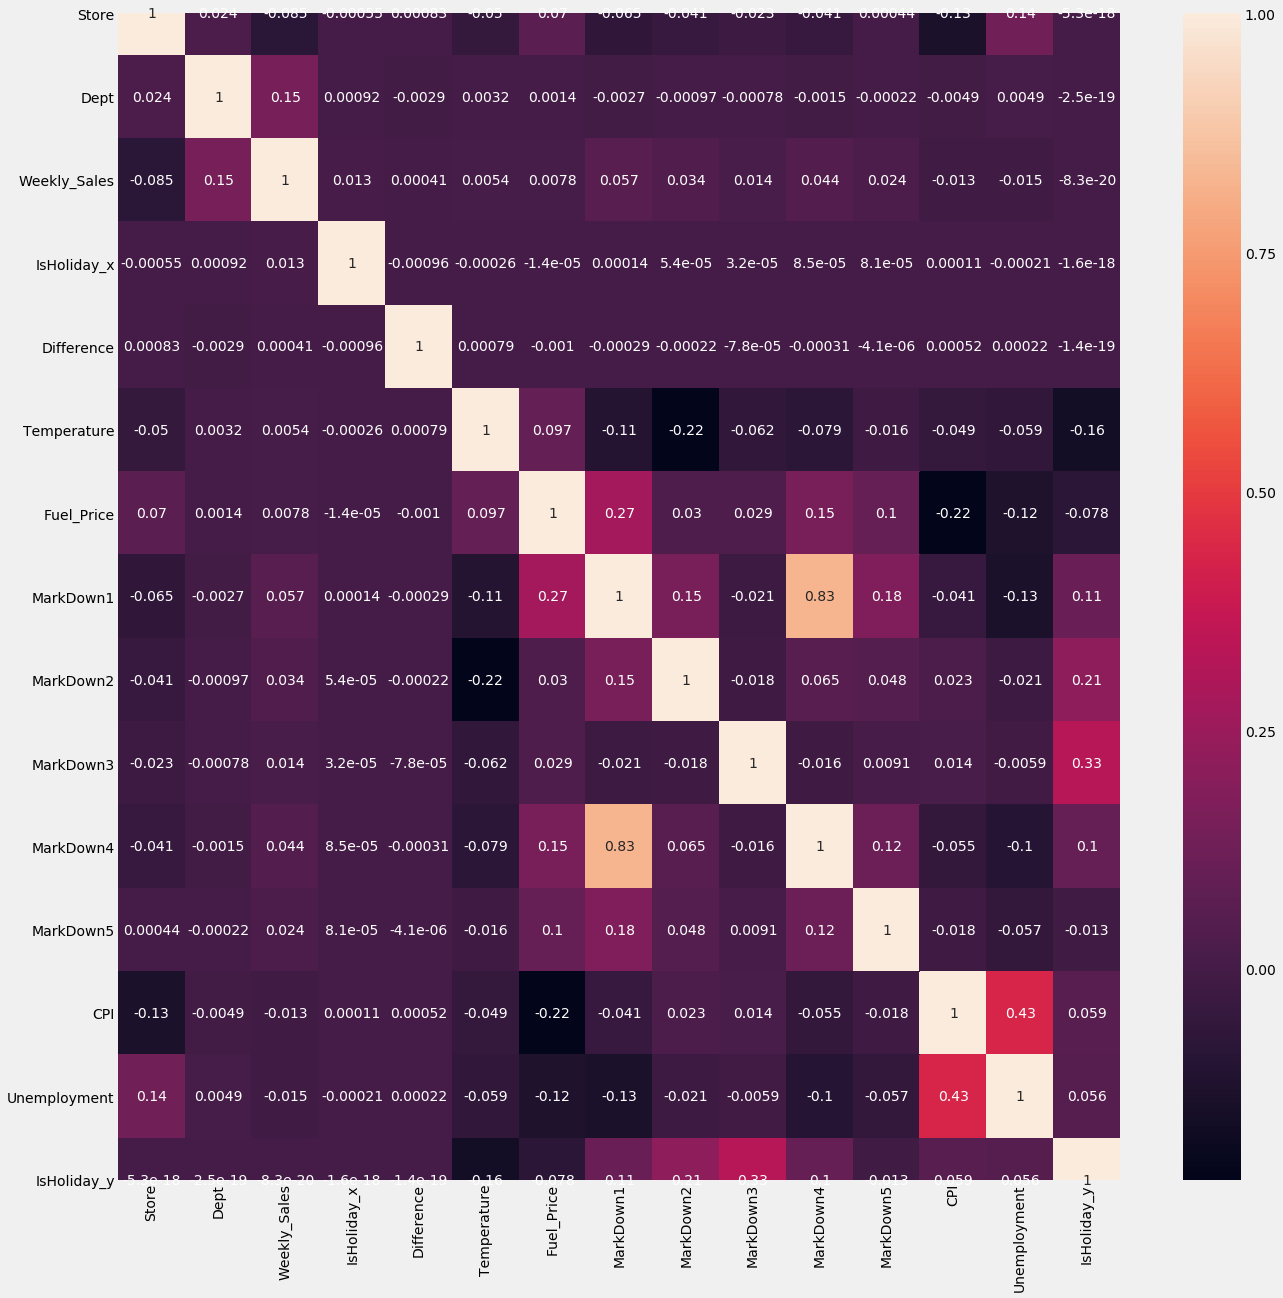

In [143]:
plt.figure(figsize=(20,20))
sns.heatmap(new.corr(),annot=True)

In [ ]:
## The correlation matrix shows the correlation between features.

In [10]:
TypeC=new[new.Store==14]
TypeC.head(5)

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
23310560,14,1,32842.31,False,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False
23310561,14,1,32842.31,False,27.73,2.773,0.0,0.0,0.0,0.0,0.0,181.982317,8.992,True
23310562,14,1,32842.31,False,31.27,2.745,0.0,0.0,0.0,0.0,0.0,182.034782,8.992,False
23310563,14,1,32842.31,False,34.89,2.754,0.0,0.0,0.0,0.0,0.0,182.077469,8.992,False
23310564,14,1,32842.31,False,37.13,2.777,0.0,0.0,0.0,0.0,0.0,182.120157,8.992,False


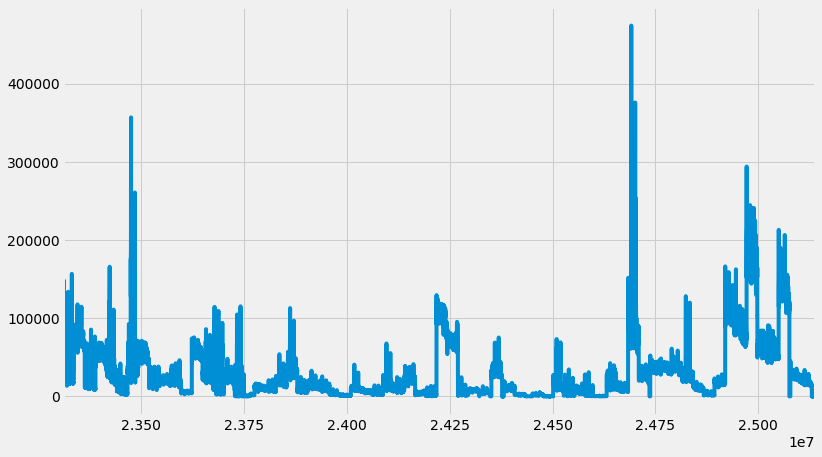

In [238]:
TypeC['Weekly_Sales'].plot()

In [ ]:
## This shows the weekly sales of the Store which has highest sales.

In [11]:
TypeC = TypeC.drop(columns=[ "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3','IsHoliday_y'])

In [12]:
TypeC['IsHoliday_x'].replace({True:1,False:0},inplace=True)

In [13]:
TypeC.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5
23310560,14,1,32842.31,0,27.31,0.0,0.0,0.0,0.0
23310561,14,1,32842.31,0,27.73,0.0,0.0,0.0,0.0
23310562,14,1,32842.31,0,31.27,0.0,0.0,0.0,0.0
23310563,14,1,32842.31,0,34.89,0.0,0.0,0.0,0.0
23310564,14,1,32842.31,0,37.13,0.0,0.0,0.0,0.0


In [14]:
### Splitting the predictor variable
x=TypeC.drop(['Weekly_Sales'],axis=1)

In [15]:
### Splitting the predicted variable
y=TypeC['Weekly_Sales']

In [18]:
x.isna().sum()

Store          0
Dept           0
IsHoliday_x    0
Temperature    0
MarkDown1      0
MarkDown2      0
MarkDown4      0
MarkDown5      0
dtype: int64

In [19]:
y.isna().sum()

0

In [16]:
### Predicting using Decision Tree:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score

In [17]:
### Splitting the data for evaluation metrics
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [259]:
decision_tree=DecisionTreeRegressor(max_depth=2)
decision_tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [264]:
### Predicting training data
pred=decision_tree.predict(X_train)
pred

array([108803.25377661,  18301.45712539,  18524.36041494, ...,
        40964.94211619,  18524.36041494,  40964.94211619])

In [38]:
def rmse(prediction,target):
    return np.sqrt(((prediction-target)**2).mean())

In [269]:
rmse(Y_train,pred)

26741.092228024325

In [272]:
r2_score(Y_train,pred)

0.47531901596306914

In [277]:
### Let us try with test data
pred_test=decision_tree.predict(X_test)

print(rmse(pred_test,Y_test))
print(r2_score(Y_test,pred_test))

26750.444224188443
0.4741776403547685


In [ ]:
## The model performs poorly with accuracy of score of 0.47 in both test and training data, we have to try different model.

In [56]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
pred=linear.predict(X_train)

In [61]:
### Training data
print(rmse(pred,Y_train))
r2_score(Y_train,pred)

35513.41670503119


0.07461606599467807

In [62]:
## Testing data

pred_test=linear.predict(X_test)

In [65]:
print(rmse(Y_test,pred_test))
r2_score(Y_test,pred_test)

35491.08889503066


0.07441629324817478

In [18]:
from sklearn.ensemble import RandomForestRegressor

randomforest=RandomForestRegressor(random_state=42)

randomforest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [58]:
pred=randomforest.predict(X_train)

In [59]:
### The model performs well with accuracy of 0.89 in training set and lets check with test set
print(rmse(Y_train,pred))
print(r2_score(Y_train,pred))

11803.12670157226
0.8977811056934385


In [60]:
pred_test=randomforest.predict(X_test)

In [61]:
#### The accuracy is almost same indicating the model performs well in train and test data
print(rmse(Y_test,pred_test))
print(r2_score(Y_test,pred_test))

12332.318948299095
0.8882451063845448


In [64]:
## Let us check for important features

important_rf=pd.Series(randomforest.feature_importances_,index=x.columns)
sorted_important_rf=important_rf.sort_values()
print(sorted_impotant_rf)

Store          0.000000
MarkDown2      0.000492
MarkDown4      0.000518
MarkDown1      0.000546
MarkDown5      0.000607
Temperature    0.003126
IsHoliday_x    0.005555
Dept           0.989157
dtype: float64


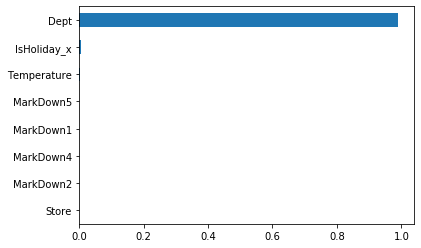

In [67]:
### Plotting the important features
sorted_important_rf.plot(kind='barh')

In [23]:
## KNN model

from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
pred=knn.predict(X_train)

In [27]:
print(rmse(Y_train,pred))
r2_score(Y_train,pred)

12762.511428897276


0.880488601434222

In [29]:
pred_test=knn.predict(X_test)

In [30]:
print(rmse(Y_test,pred_test))
print(r2_score(Y_test,pred_test))

13212.761632710783
0.8717184339543258


In [18]:
## Let us check for best hypetparameter using Grid SearchCv

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

randomforest=RandomForestRegressor(random_state=42)

params_rf={
    'n_estimators':[300,400,500],
    'max_depth':[4,6,8],
    'min_samples_leaf':[0.1,0.2],
    'max_features':['log2','sqrt']
}

grid_rf=GridSearchCV(estimator=randomforest,cv=3,param_grid=params_rf)

In [19]:
grid_rf.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [27]:
##### Extracting best hyperparameter
best_hyperparams=grid_rf.best_params_
best_hyperparams

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 500}

In [28]:
#### Extracting best model
best_model=grid_rf.best_estimator_

In [29]:
pred=best_model.predict(X_train)

In [39]:
r2_score(Y_train,pred)
rmse(Y_train,pred)

33471.128360151095

In [45]:
d={'models':['Linear Regression','Decision Tree Regressor','K-NN Regressor','Random Forest Regressor'], 'R2_score':[0.074616,0.475319,0.8717,0.897781],'RMSE':[35513.41,26741.092,12762.51,11803.12]}
model_train_score=pd.DataFrame(data=d)
model_train_score

,models,R2_score,RMSE
0,Linear Regression,0.074616,35513.410
1,Decision Tree Regressor,0.475319,26741.092
2,K-NN Regressor,0.871700,12762.510
3,Random Forest Regressor,0.897781,11803.120


In [48]:
d1={'models':['Linear Regression','Decision Tree Regressor','K-NN Regressor','Random Forest Regressor'], 'R2_score':[0.074616,0.474177,0.8804,0.888],'RMSE':[35491.088,26750.4442,13212.761,12332.31]}
mod_test=pd.DataFrame(data=d1)
mod_test

,models,R2_score,RMSE
0,Linear Regression,0.074616,35491.0880
1,Decision Tree Regressor,0.474177,26750.4442
2,K-NN Regressor,0.880400,13212.7610
3,Random Forest Regressor,0.888000,12332.3100


In [ ]:
## As expected linear regression performs really badly with non linear data, Compared to all the models
## the Knn might have same bias with higher prediction accuracy in the test data, so the Random Forest 
## Regressor is the best model and let us tune it with GridSearchCv for better hyperparameters.

In [19]:
### Predicitng the test data set:
new_test=pd.merge(left=walmart_test,right=features,on='Store',how='inner')
new_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2012-11-02,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2012-11-02,False,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2012-11-02,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2012-11-02,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2012-11-02,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [20]:
new_test=new_test.fillna(0)

In [21]:
TypeC_test=new_test[new_test.Store==14]
TypeC_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
6350162,14,1,2012-11-02,False,27.31,2.784,0.0,0.0,0.0,0.0,0.0,181.871190,8.992,False
6350163,14,1,2012-11-02,False,27.73,2.773,0.0,0.0,0.0,0.0,0.0,181.982317,8.992,True
6350164,14,1,2012-11-02,False,31.27,2.745,0.0,0.0,0.0,0.0,0.0,182.034782,8.992,False
6350165,14,1,2012-11-02,False,34.89,2.754,0.0,0.0,0.0,0.0,0.0,182.077469,8.992,False
6350166,14,1,2012-11-02,False,37.13,2.777,0.0,0.0,0.0,0.0,0.0,182.120157,8.992,False


In [22]:
TypeC_test=TypeC_test.drop(columns=["CPI", "Fuel_Price", 'Unemployment', 'MarkDown3','IsHoliday_y'])
TypeC_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5
6350162,14,1,2012-11-02,False,27.31,0.0,0.0,0.0,0.0
6350163,14,1,2012-11-02,False,27.73,0.0,0.0,0.0,0.0
6350164,14,1,2012-11-02,False,31.27,0.0,0.0,0.0,0.0
6350165,14,1,2012-11-02,False,34.89,0.0,0.0,0.0,0.0
6350166,14,1,2012-11-02,False,37.13,0.0,0.0,0.0,0.0


In [23]:
TyperC_test=TypeC_test['IsHoliday_x'].replace({True:1,False:0},inplace=True)

In [24]:
TypeC_test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5
6350162,14,1,2012-11-02,0,27.31,0.0,0.0,0.0,0.0
6350163,14,1,2012-11-02,0,27.73,0.0,0.0,0.0,0.0
6350164,14,1,2012-11-02,0,31.27,0.0,0.0,0.0,0.0
6350165,14,1,2012-11-02,0,34.89,0.0,0.0,0.0,0.0
6350166,14,1,2012-11-02,0,37.13,0.0,0.0,0.0,0.0


In [25]:
date=TypeC_test['Date']

In [26]:
TypeC_test=TypeC_test.drop(columns=['Date'])

In [27]:
pred_test_final=randomforest.predict(TypeC_test)

In [28]:
print(pred_test_final)

[31277.14699551 27521.08479957 31364.83850763 ...   752.57949152
   712.4312194    732.82371148]


In [29]:
typeC_index=walmart_test[walmart_test.Store==14]
typeC_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2706 entries, 34891 to 37596
Data columns (total 4 columns):
Store        2706 non-null int64
Dept         2706 non-null int64
Date         2706 non-null object
IsHoliday    2706 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 87.2+ KB


In [31]:
TypeC_sales=pd.DataFrame(pred_test_final,index=date,columns=['Sales'])
TypeC_sales.head()

,Sales
Date,
2012-11-02,31277.146996
2012-11-02,27521.084800
2012-11-02,31364.838508
2012-11-02,30806.143371
2012-11-02,30771.502195


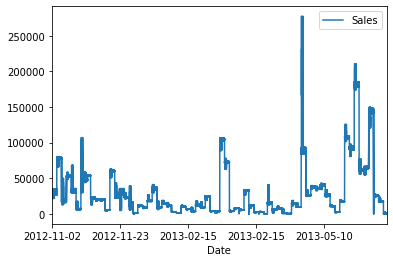

In [35]:
## Plotting the future sales
TypeC_sales.plot()

In [ ]:
## This Plot shows the predicted value for the Store 14 for next 2 years in weekly basis.